In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' ##matplotlib


In [2]:
x_lable_positive = np.concatenate((np.random.normal(3,1,(30,1)),np.random.normal(3,1,(30,1))),axis=1)

In [3]:
x_lable_negative = np.concatenate((np.random.normal(-3,1,(30,1)),np.random.normal(-3,1,(30,1))),axis=1)

In [4]:
X = np.concatenate((x_lable_positive,x_lable_negative),axis=0)

In [5]:
Y=[1]*30+[-1]*30

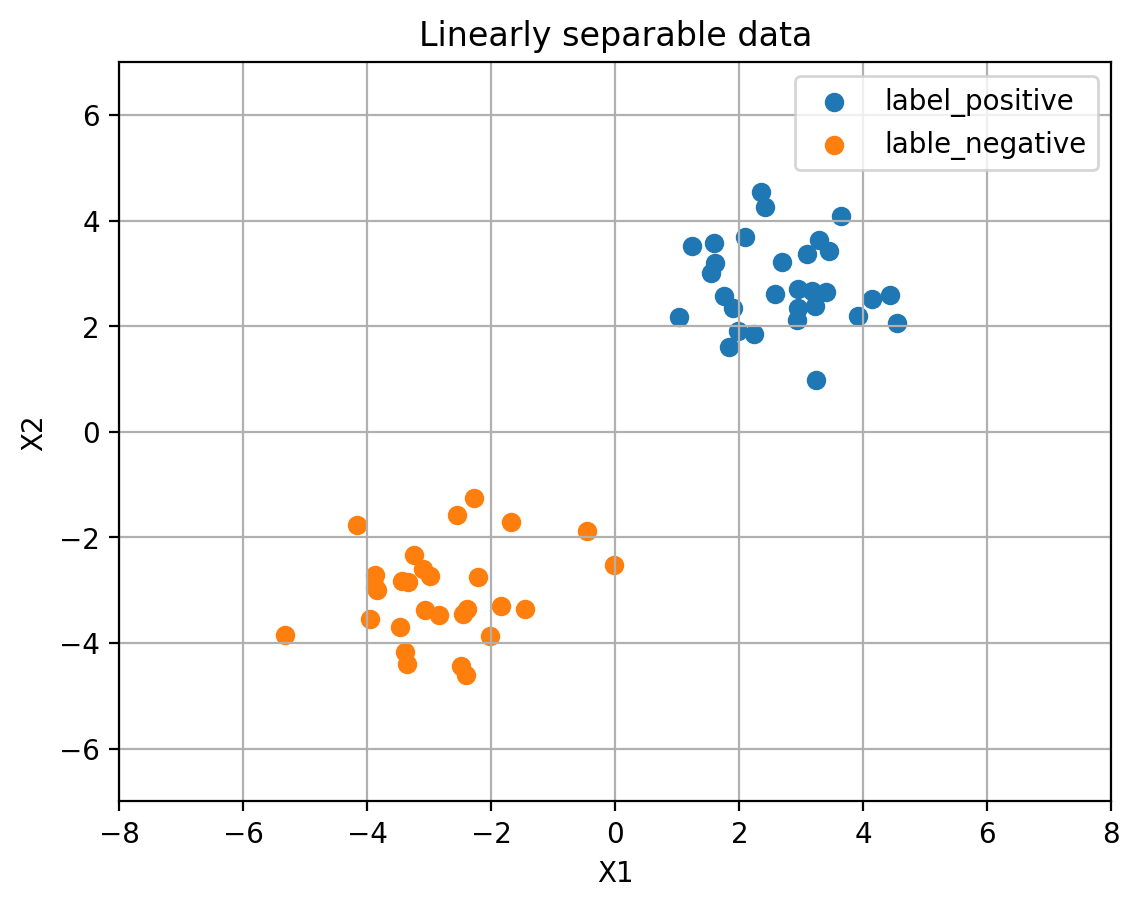

In [6]:
plt.title("Linearly separable data")
plt.xlim(-8,8)
plt.ylim((-7, 7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[0:30,0],X[0:30,1],label="label_positive")
plt.scatter(X[31:60,0],X[31:60,1],label="lable_negative")
plt.grid()
plt.legend(loc='best')

In [7]:
import sklearn.linear_model

In [8]:
clf = sklearn.linear_model.LogisticRegression(penalty='none',tol=1e-7,solver='sag',max_iter=1000000)

In [9]:
clf.fit(X,Y)

d:\大学\硕士\研一上\AI-Design\ai_env\venv_ai\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000000, penalty='none', solver='sag', tol=1e-07)

In [10]:
clf.n_iter_

array([719802])

In [11]:
w = np.zeros((10,2))
b = np.zeros((10,1))

In [12]:
iters = np.zeros(10)
for i in range(4,14):
    clf = sklearn.linear_model.LogisticRegression(penalty='none',tol=10**(-i),solver='sag',max_iter=1000000000)
    iters[i-4] = clf.fit(X,Y).n_iter_
    w[i-4] = clf.coef_[0]
    b[i-4] = clf.intercept_[0]

d:\大学\硕士\研一上\AI-Design\ai_env\venv_ai\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\大学\硕士\研一上\AI-Design\ai_env\venv_ai\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\大学\硕士\研一上\AI-Design\ai_env\venv_ai\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\大学\硕士\研一上\AI-Design\ai_env\venv_ai\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\大学\硕士\研一上

In [13]:
iters

array([1.1810000e+03, 1.0412000e+04, 8.2975000e+04, 7.2904000e+05,
       6.2529660e+06, 5.5636926e+07, 5.0381060e+08, 1.0000000e+09,
       1.0000000e+09, 1.0000000e+09])

In [14]:
w

array([[2.17119483, 3.10294581],
       [2.69798745, 3.88495603],
       [2.93031508, 4.85704852],
       [3.47049266, 5.67274029],
       [3.83013519, 6.62480032],
       [4.30568501, 7.52232518],
       [4.83631061, 8.39957844],
       [4.94173221, 8.71625534],
       [5.04526581, 8.64332007],
       [4.85499091, 8.78005994]])

In [15]:
b

array([[-0.38246065],
       [-0.58190814],
       [-0.58689296],
       [-0.89907411],
       [-1.02037673],
       [-1.2526698 ],
       [-1.53210845],
       [-1.56256237],
       [-1.66259708],
       [-1.47723375]])

In [16]:
log_SSE = np.log(np.array([10**(-4),10**(-5),10**(-6),10**(-7),10**(-8),10**(-9),10**(-10)]))
w_2 = np.zeros(7) 
for i in range(0,7):
    w_2[i] = w[i,0]**2 + w[i,1]**2

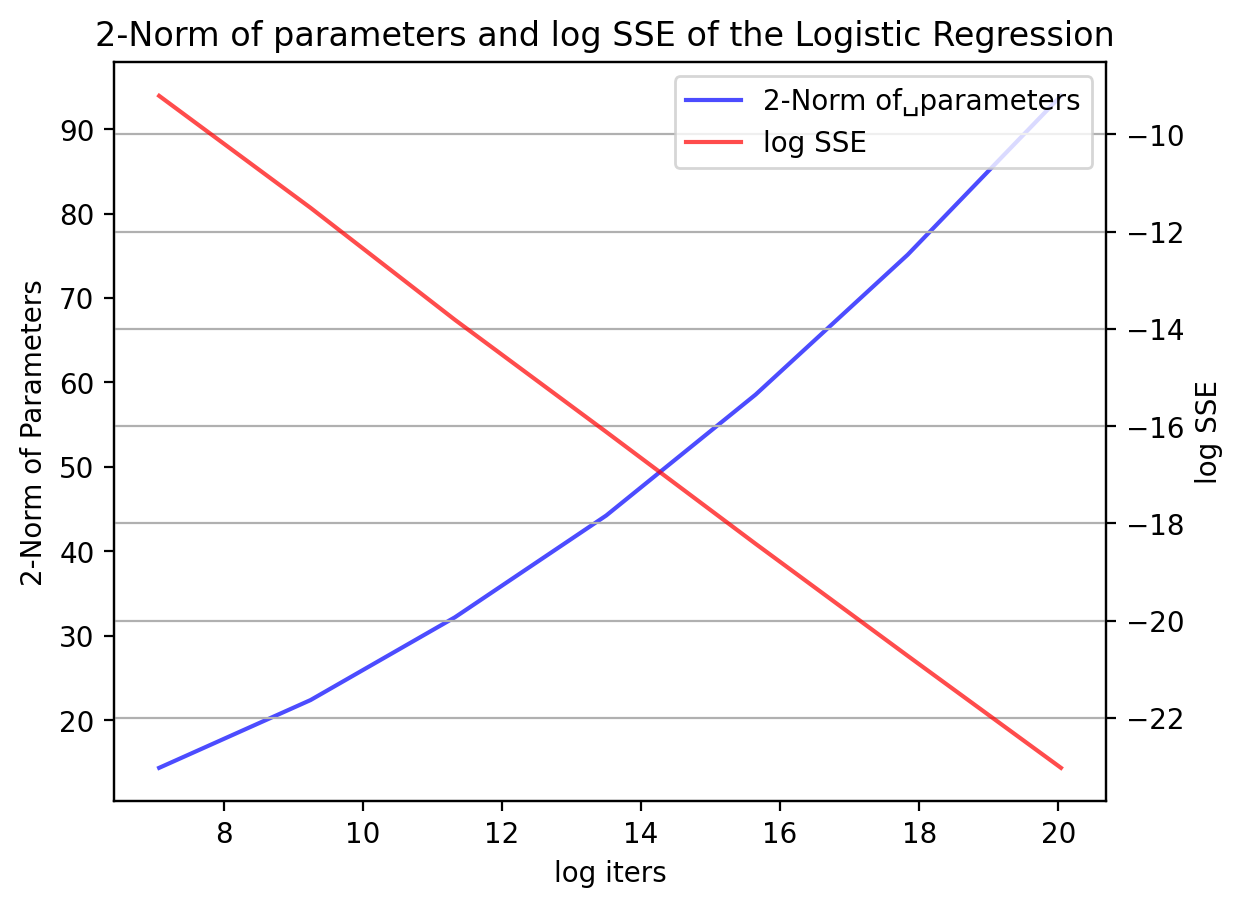

In [17]:
fig,ax1 = plt.subplots()
plt.title("2-Norm of parameters and log SSE of the Logistic Regression ")
ax1.plot(np.log(iters[0:7]), w_2 , color="blue", alpha=0.7, label="2-Norm of␣parameters")
ax1.set_xlabel("log iters")
ax1.set_ylabel("2-Norm of Parameters")
ax2 = ax1.twinx()
ax2.plot(np.log(iters[0:7]), log_SSE , color="red",alpha=0.7, label="log SSE")
ax2.set_ylabel("log SSE")
fig.legend(loc="upper right", bbox_to_anchor = (1,1), bbox_transform=ax1.transAxes)
plt.grid()

In [18]:
m = - w[0:7,0]/w[0:7,1]
n = - b.T[0][0:7]/w[0:7,1]

In [19]:
XX = np.linspace(-10,10)
YY0 = m[0]*XX+n[0]
YY1 = m[1]*XX+n[1]
YY2 = m[2]*XX+n[2]
YY3 = m[3]*XX+n[3]
YY4 = m[4]*XX+n[4]
YY5 = m[5]*XX+n[5]
YY6 = m[6]*XX+n[6]

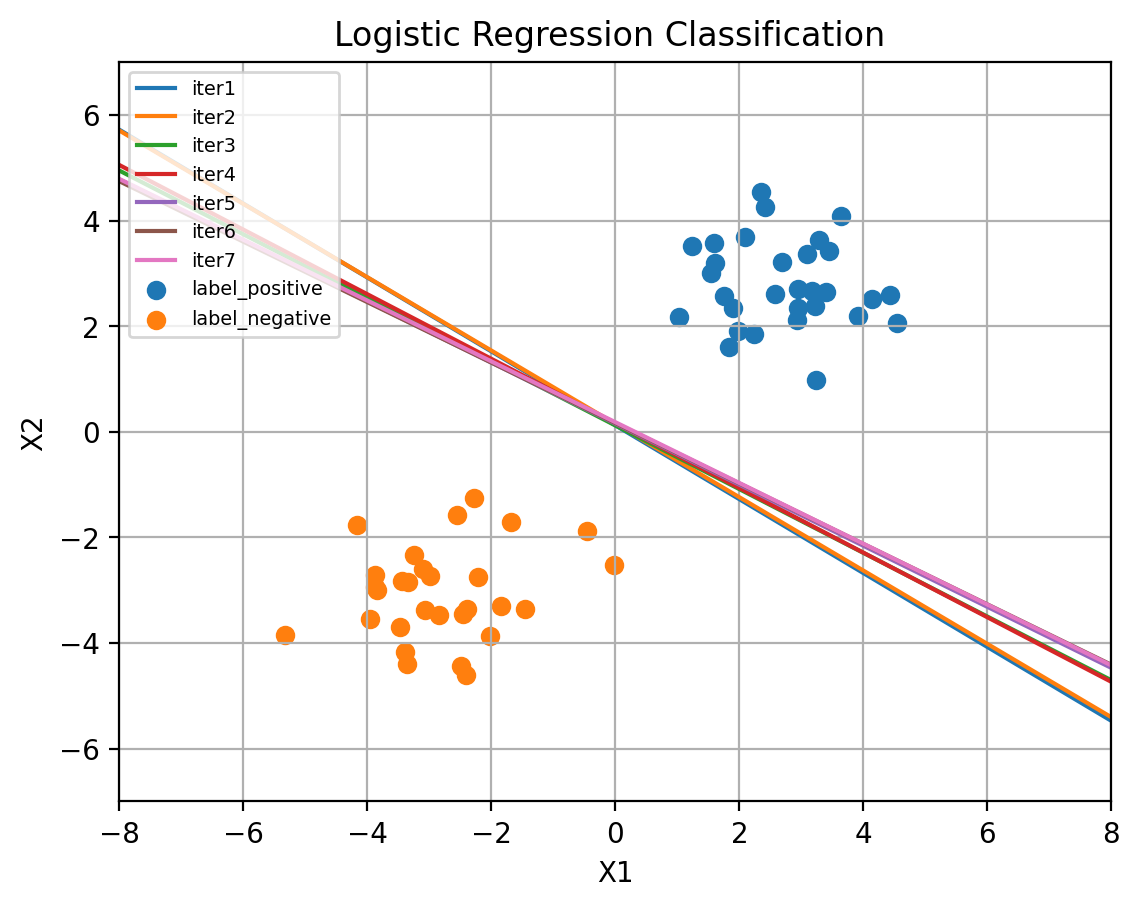

In [20]:
plt.plot(XX,YY0,'-',label='iter1')
plt.plot(XX,YY1,'-',label='iter2')
plt.plot(XX,YY2,'-',label='iter3')
plt.plot(XX,YY3,'-',label='iter4')
plt.plot(XX,YY4,'-',label='iter5')
plt.plot(XX,YY5,'-',label='iter6')
plt.plot(XX,YY6,'-',label='iter7')
plt.title("Logistic Regression Classification ")
plt.xlim(-8,8)
plt.ylim((-7, 7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[0:30,0],X[0:30,1],label="label_positive")
plt.scatter(X[31:60,0],X[31:60,1],label="label_negative")
plt.grid()
plt.legend(loc='upper left',fontsize='x-small')

In [21]:
import sklearn.svm

In [22]:
clf2 = sklearn.svm.SVC(kernel='linear',tol=1e-7)

In [23]:
clf2.fit(X,Y)

SVC(kernel='linear', tol=1e-07)

In [24]:
w2,b2=clf2.coef_[0], clf2.intercept_[0]

In [25]:
w2

array([0.262421  , 0.40109457])

In [26]:
b2

-0.12678973166336308

In [27]:
s = clf2.support_vectors_

In [28]:
s

array([[-0.45474638, -1.87954489],
       [ 1.82974157,  1.61215629]])

In [29]:
k,b0=-w2[0]/w2[1],-b2/w2[1]
b1=(w2[0]*s[0][0]+w2[1]*s[0][1])/w2[1]
b2=(w2[0]*s[1][0]+w2[1]*s[1][1])/w2[1]

In [30]:
XX=np.linspace(-10,10)
YY0=k*XX+b0
YY1=k*XX+b1
YY2=k*XX+b2

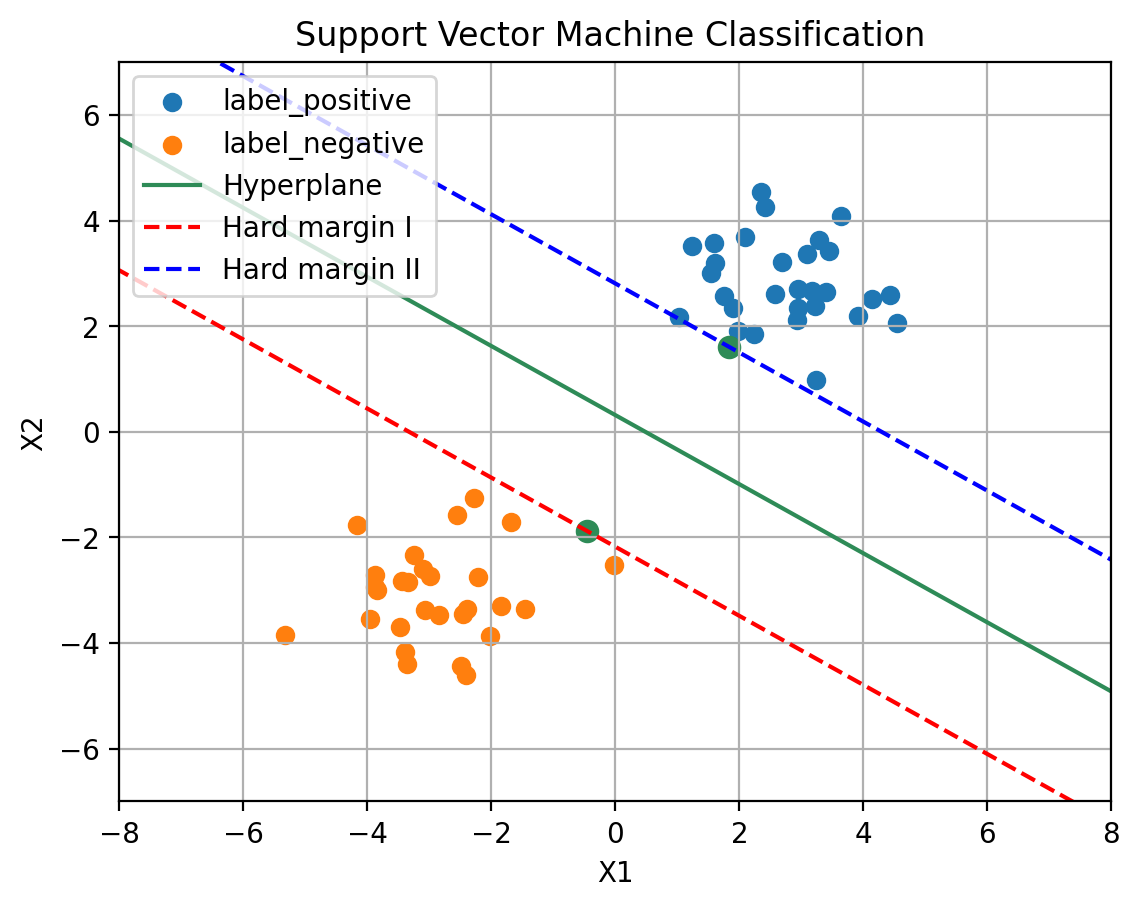

In [31]:
plt.title("Support Vector Machine Classification ")
plt.xlim(-8,8)
plt.ylim((-7, 7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[0:30,0],X[0:30,1],label="label_positive")
plt.scatter(X[31:60,0],X[31:60,1],label="label_negative")
plt.grid()
plt.legend(loc='best')
plt.plot(XX,YY0,'-',label='Hyperplane',c='Seagreen')
plt.plot(XX,YY1,'--r',label='Hard margin I')
plt.plot(XX,YY2,'--b',label='Hard margin II')
plt.legend(loc='upper left')
for i in s:
    plt.scatter(i[0],i[1],s=20,c='Seagreen',linewidths=4,edgecolors='Seagreen')
    